In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [33]:
FEATURES_CSVS_PATH = "features_csvs/"
CATEGORIA_ACTUAL = "nivel_desemp_ciencias_naturales"
PONDERADOR_ACTUAL = "ponderador_ciencias_naturales"
CATEGORIA_NIVEL = "ciencias_naturales"
CATEGORIA_LABEL = "Ciencias Naturales"

In [34]:
train = pd.read_csv(FEATURES_CSVS_PATH+"train_%s.csv" % CATEGORIA_NIVEL)
test = pd.read_csv(FEATURES_CSVS_PATH+"test_%s.csv" % CATEGORIA_NIVEL)

In [35]:
X_columns = [c for c in train.columns if c not in ['alumne_id', PONDERADOR_ACTUAL, CATEGORIA_ACTUAL, 'nivel']]
Y_columns = CATEGORIA_ACTUAL

In [36]:
X_train = train[X_columns]
Y_train = train[Y_columns]

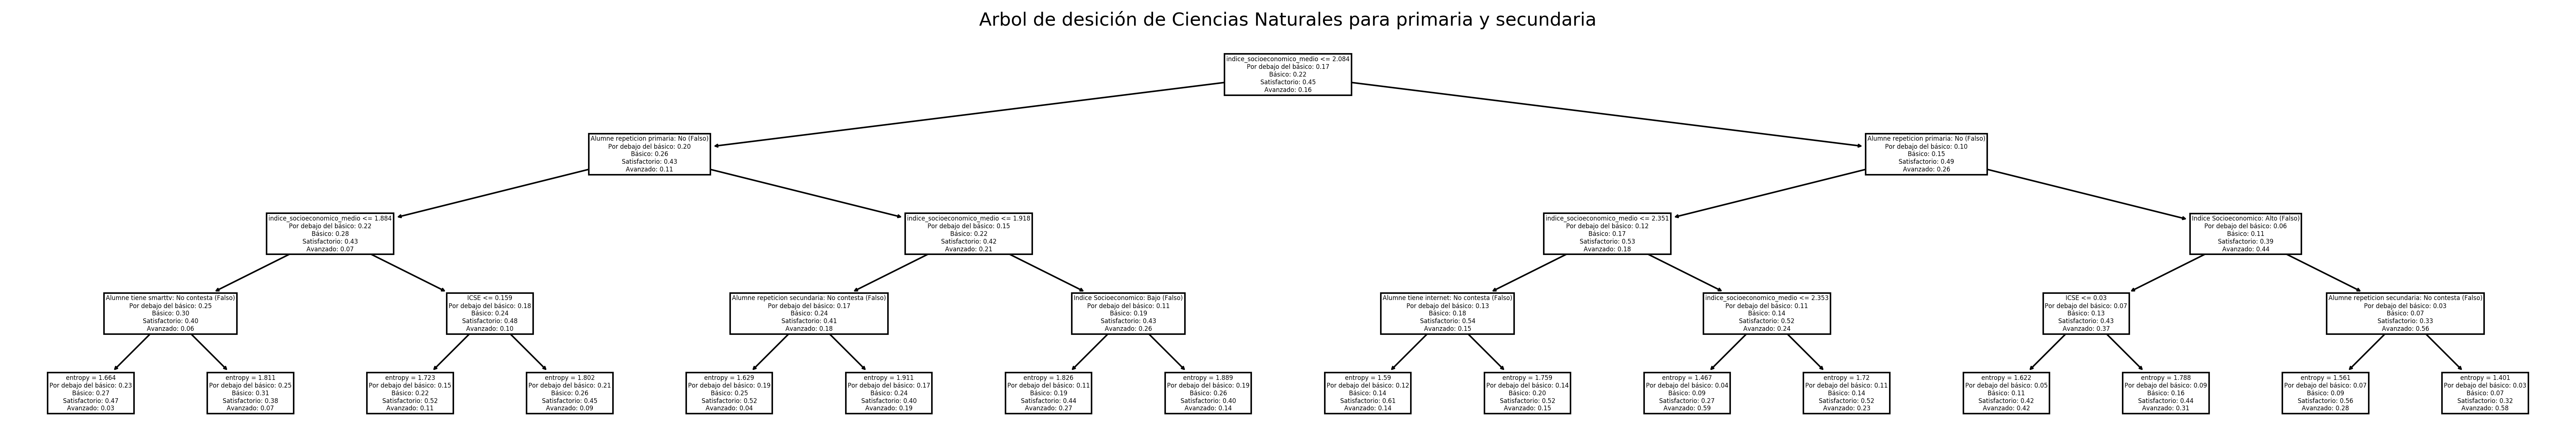

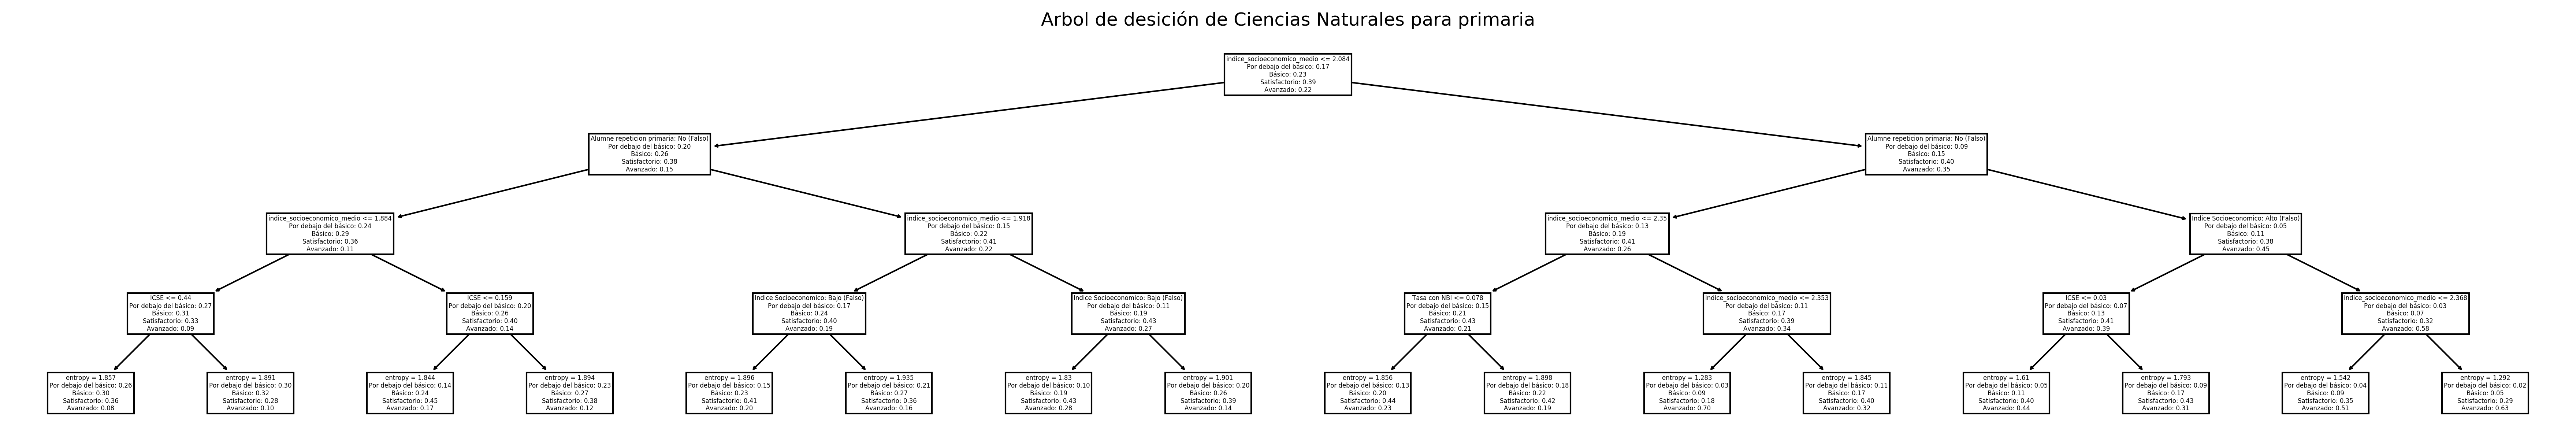

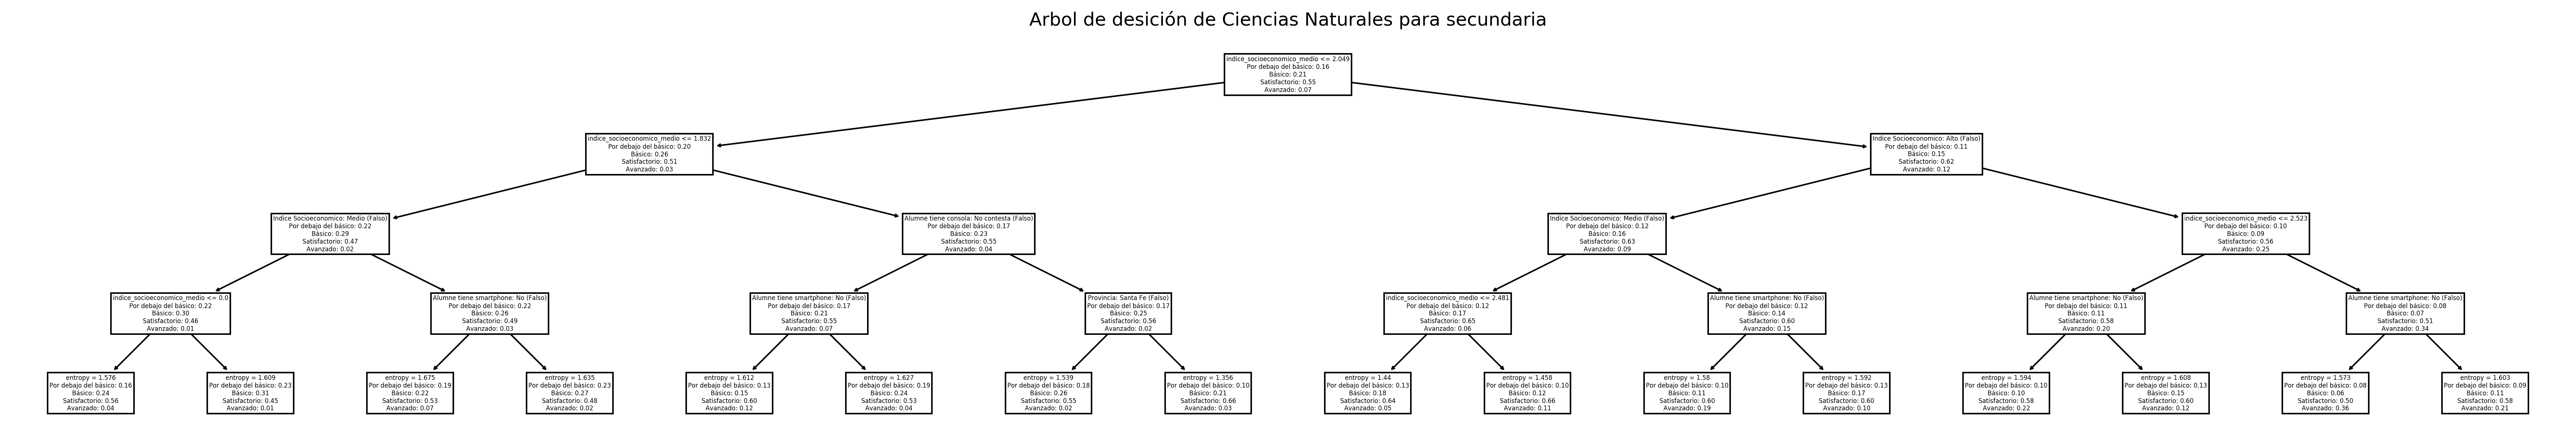

In [37]:
X_train = train[X_columns]
Y_train = train[Y_columns]

basic_tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=4)
basic_tree.fit(X_train, Y_train)

plt.figure(dpi=300, figsize=[30, 4.8])

tree_list = plot_tree(basic_tree, feature_names=X_columns, fontsize=4)
plt.title("Arbol de desición de %s para primaria y secundaria" % CATEGORIA_LABEL)
CLASSES_ALIASES = {'por_debajo_del_basico': 'Por debajo del básico','basico': 'Básico', 'satisfactorio': 'Satisfactorio', 'avanzado': 'Avanzado'}
CLASSES_ORDER = ['Por debajo del básico','Básico','Satisfactorio','Avanzado']
for i in range(len(tree_list)):
    text = tree_list[i].get_text().replace("<= 0.5", "(Falso)")
    split = text.split("\n")[0]
    values = text.split("\n")[-1].replace(" ", "").replace("[","").replace("]","").replace("value=","").split(",")
    text = split
    quantity_by_class = {}
    for j in range(len(basic_tree.classes_)):
        quantity_by_class[CLASSES_ALIASES[basic_tree.classes_[j]]] = int(values[j])
    for k in CLASSES_ORDER:
        text+="\n%s: %0.2f" % (k, quantity_by_class[k]/sum(quantity_by_class.values()))
    tree_list[i].set_text(text)

plt.savefig("plots/tree_%s.png" % CATEGORIA_NIVEL)

X_train = train[train["nivel"]=="primaria"][X_columns]
Y_train = train[train["nivel"]=="primaria"][Y_columns]

basic_tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=4)
basic_tree.fit(X_train, Y_train)

plt.figure(dpi=300, figsize=[30, 4.8])

tree_list = plot_tree(basic_tree, feature_names=X_columns, fontsize=4)
plt.title("Arbol de desición de %s para primaria" % CATEGORIA_LABEL)
CLASSES_ALIASES = {'por_debajo_del_basico': 'Por debajo del básico','basico': 'Básico', 'satisfactorio': 'Satisfactorio', 'avanzado': 'Avanzado'}
CLASSES_ORDER = ['Por debajo del básico','Básico','Satisfactorio','Avanzado']
for i in range(len(tree_list)):
    text = tree_list[i].get_text().replace("<= 0.5", "(Falso)")
    split = text.split("\n")[0]
    values = text.split("\n")[-1].replace(" ", "").replace("[","").replace("]","").replace("value=","").split(",")
    text = split
    quantity_by_class = {}
    for j in range(len(basic_tree.classes_)):
        quantity_by_class[CLASSES_ALIASES[basic_tree.classes_[j]]] = int(values[j])
    for k in CLASSES_ORDER:
        text+="\n%s: %0.2f" % (k, quantity_by_class[k]/sum(quantity_by_class.values()))
    tree_list[i].set_text(text)

plt.savefig("plots/tree_%s_primaria.png" % CATEGORIA_NIVEL)

X_train = train[train["nivel"]=="secundaria"][X_columns]
Y_train = train[train["nivel"]=="secundaria"][Y_columns]

basic_tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=4)
basic_tree.fit(X_train, Y_train)

plt.figure(dpi=300, figsize=[30, 4.8])

tree_list = plot_tree(basic_tree, feature_names=X_columns, fontsize=4)
plt.title("Arbol de desición de %s para secundaria" % CATEGORIA_LABEL)
CLASSES_ALIASES = {'por_debajo_del_basico': 'Por debajo del básico','basico': 'Básico', 'satisfactorio': 'Satisfactorio', 'avanzado': 'Avanzado'}
CLASSES_ORDER = ['Por debajo del básico','Básico','Satisfactorio','Avanzado']
for i in range(len(tree_list)):
    text = tree_list[i].get_text().replace("<= 0.5", "(Falso)")
    split = text.split("\n")[0]
    values = text.split("\n")[-1].replace(" ", "").replace("[","").replace("]","").replace("value=","").split(",")
    text = split
    quantity_by_class = {}
    for j in range(len(basic_tree.classes_)):
        quantity_by_class[CLASSES_ALIASES[basic_tree.classes_[j]]] = int(values[j])
    for k in CLASSES_ORDER:
        text+="\n%s: %0.2f" % (k, quantity_by_class[k]/sum(quantity_by_class.values()))
    tree_list[i].set_text(text)

plt.savefig("plots/tree_%s_secundaria.png" % CATEGORIA_NIVEL)